In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Tahap pertama yaitu melakukan langkah yang dapat dieksekusi dalam mengolah data untuk mendapatkan tujuan yaitu dengan cara melakukan ETL pada data-data tersebut. ETL merupakan proses untuk mengolah data menjadi daya yang bersih sesuai dengan ketentuan data warehouse.
1. Extraction, proses ini melakukan penarikan data yang diberikan pada awal project yaitu data_hotel.xlsx dan review_hotel.xlsx

Review_hotel.xlsx :

- booking_id = nomor booking
- booking_date = tanggal booking
- hotel_id = id hotel yang telah dibooking
- hotel_name = nama hotel
- stay_duration = lama menginap
- adult = jumlah orang dewasa yang menginap
- children = jumlah anak yang menginap
- rating = rating hasil penilaian customer terhadap pelayanan hotel dan hotelnya
- review = review costumer terhadap pelayanan hotel dan hotelnya

Data_hotel.xlsx :

- hotel_id = id hotel
- hotel_name = nama_hotel
- hotel_description = deskripsi hotel
- hotel_province = provinsi hotel
- hotel_city = daerah/kota hotel
- hotel_address = alamat hotel
- price_per_night = harga sewa kamar per malam




In [6]:
data_hotel = pd.read_excel('data_hotel.xlsx')
review_hotel = pd.read_excel('review_hotel.xlsx')

In [8]:
data_hotel.head()

,hotel_id,hotel_name,hotel_description,hotel_province,hotel_city,hotel_address,price_per_night
0,h0001,Midtown Residence Marvell City Surabaya,NaN,Jawa Timur,Surabaya,Jalan Ngagel Raya No 123,527866.666667
1,h0002,favehotel Graha Agung Surabaya,Sebuah Hotel Mewah di Surabaya Persembahan dar...,Jawa Timur,Surabaya,Jl. Mayjen Yono Soewoyo Pakuwon Indah Square A...,442860.000000
2,h0003,The Sun Hotel Sidoarjo,Hotel Bintang 3 Pertama dan Satu-satunya di Si...,Jawa Timur,Surabaya,"Jl. Pahlawan No.1,Sidokumpul, Sidoarjo, Suraba...",305000.000000
3,h0004,Grand Surabaya Hotel,Penginapan Yang Tenang Dan Nyaman Di Surabaya.,Jawa Timur,Surabaya,"Jl. Pemuda 19-21, Surabaya, Indonesia",324999.333333
4,h0005,The WIN Hotel Surabaya,WIN Hotel adalah hotel smart bintang 3 yang me...,Jawa Timur,Surabaya,"Jl. Embong Tanjung 46 - 48 Surabaya, Jawa Timu...",310947.250000


Melakukan perubahan tipe data pada price_per_night karena dia merupakan tipe data float, sedangkan pada kasus nyata tidak ada harga hotel dalam bentuk desimal. namun akan dibiarkan terlebih dahulu untuk penelitian atau keperluan analisis lebih lanjut

In [9]:
data_hotel.info()
data_hotel.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hotel_id           1199 non-null   object 
 1   hotel_name         1199 non-null   object 
 2   hotel_description  1098 non-null   object 
 3   hotel_province     1199 non-null   object 
 4   hotel_city         1199 non-null   object 
 5   hotel_address      1199 non-null   object 
 6   price_per_night    1193 non-null   float64
dtypes: float64(1), object(6)
memory usage: 65.7+ KB


hotel_id               0
hotel_name             0
hotel_description    101
hotel_province         0
hotel_city             0
hotel_address          0
price_per_night        6
dtype: int64

In [10]:
data_hotel.loc[data_hotel['price_per_night'].isnull()]

,hotel_id,hotel_name,hotel_description,hotel_province,hotel_city,hotel_address,price_per_night
123,h0124,OYO 886 Omahku Asri Syariah,NaN,Jawa Timur,Malang,Jl. Danau Matana F3 A5,NaN
124,h0125,OYO 3712 Hotel Palem Sari,NaN,Jawa Timur,Malang,"Jalan Raya Punten 02, Kecamatan. Bumiaji",NaN
383,h0384,OYO 1185 Bukit Toedjoeh Residence Syariah,NaN,Sumatra Utara,Medan,"Jl. Bukit Barisan I No.7, Glugur Darat II, Kec...",NaN
389,h0390,OYO 597 Joyce Guest House,NaN,Sumatra Utara,Medan,Jalan Bunga Wijaya Kusuma no 62 padang bulan s...,NaN
392,h0393,OYO 1274 Prime Inn,NaN,Sumatra Utara,Medan,"Jl. Waru No.65, Sekip, Medan Petisah, Kota Med...",NaN
436,h0437,OYO 711 Salam Residence Syariah,NaN,Sumatra Utara,Medan,"Jl. Ringroad No.92, Sei Sikambing B, Medan Sun...",NaN


Dari perolehan data diatas dapat diketahui bahwa :
- data price_per_night terdapat nilai null(NAN) sehingga akan dibuang
- data hotel_description juga terdapat nilai null(NAN) dan akan diubah menjadi tanda strip yang berarti tidak ada deskripsi hotel

In [11]:
# codingan dibawah menjelaskan kita ingin membuang data null pada price_per_night dan mengganti data NAN pada hotel description
data_hotel = data_hotel.loc[data_hotel['price_per_night'].notnull()]
data_hotel['hotel_description'] = data_hotel['hotel_description'].fillna('-')

data_hotel['hotel_description'] = data_hotel['hotel_description'].str.replace('\n \n', '')
data_hotel['hotel_description'] = data_hotel['hotel_description'].str.replace('\n', ' ')

data_hotel.isnull().sum()

<ipython-input-11-2dde2aae8fe5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hotel['hotel_description'] = data_hotel['hotel_description'].fillna('-')
<ipython-input-11-2dde2aae8fe5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hotel['hotel_description'] = data_hotel['hotel_description'].str.replace('\n \n', '')
<ipython-input-11-2dde2aae8fe5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

hotel_id             0
hotel_name           0
hotel_description    0
hotel_province       0
hotel_city           0
hotel_address        0
price_per_night      0
dtype: int64

Data hotel cleansing done dan tidak terdapat missing value namun price_per_night tetap dengan data float

# Data Cleansing Review Hotel

In [12]:
review_hotel

,booking_id,booking_date,hotel_id,hotel_name,stay_duration,adults,children,rating,review
0,b0001,19-04-2020,h0014,Zest Hotel Jemursari Surabaya,1,2,1,8.4,Short stay
1,b0002,06-04-2020,h0014,Zest Hotel Jemursari Surabaya,1,1,1,10.0,Hotelnya nyaman
2,b0003,24-03-2020,h0014,Zest Hotel Jemursari Surabaya,2,2,1,9.2,Cukup baik untuk transit
3,b0004,23-03-2020,h0014,Zest Hotel Jemursari Surabaya,1,2,0,9.2,Nyaman
4,b0005,14-03-2020,h0014,Zest Hotel Jemursari Surabaya,2,2,1,6.8,Not good
...,...,...,...,...,...,...,...,...,...
4301,b4302,10-08-2019,h0791,The Luxton Bandung,1,2,2,3.6,Hotel kurang perawatan dan membosankan
4302,b4303,25-07-2019,h0791,The Luxton Bandung,2,2,2,6.8,Kurang perawatan
4303,b4304,08-07-2019,h0791,The Luxton Bandung,2,2,2,10.0,Mantul
4304,b4305,15-04-2019,h0791,The Luxton Bandung,3,2,2,3.6,Kecewa


In [13]:
review_hotel.info()
review_hotel.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4306 entries, 0 to 4305
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   booking_id     4306 non-null   object 
 1   booking_date   4306 non-null   object 
 2   hotel_id       3833 non-null   object 
 3   hotel_name     4306 non-null   object 
 4   stay_duration  4306 non-null   int64  
 5   adults         4306 non-null   int64  
 6   children       4306 non-null   int64  
 7   rating         4306 non-null   float64
 8   review         4306 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 302.9+ KB


booking_id         0
booking_date       0
hotel_id         473
hotel_name         0
stay_duration      0
adults             0
children           0
rating             0
review             0
dtype: int64

In [14]:
review_hotel = review_hotel.dropna()
review_hotel.isnull().sum()

booking_id       0
booking_date     0
hotel_id         0
hotel_name       0
stay_duration    0
adults           0
children         0
rating           0
review           0
dtype: int64

In [15]:
print (data_hotel.shape)
print (review_hotel.shape)

(1193, 7)
(3833, 9)


In [16]:
# mencari rata-rata rating dari setiap hotel
rating1gb = review_hotel[['hotel_id','rating']].groupby(['hotel_id']).mean().reset_index()
rating1gb.head()

,hotel_id,rating
0,h0001,9.20
1,h0002,8.32
2,h0003,8.76
3,h0004,8.52
4,h0005,8.04


In [17]:
rating2gb = review_hotel[['hotel_name','rating']].groupby(['hotel_name']).mean()
rating = rating2gb.reset_index()
rating.head()

,hotel_name,rating
0,45 Residence,3.60
1,7 Days Premium Hotel,8.20
2,AONE Hotel,8.84
3,AYANA Midplaza Jakarta,9.44
4,Adimulia Hotel Medan,8.80


In [18]:
count_rating = review_hotel.groupby('hotel_name')['rating'].count().sort_values(ascending=False)
count_rating

hotel_name
The Salis Hotel Setiabudi                      20
Grand Tebu Hotel                               20
Vio Hotel Surapati                             20
Grand Asrilia Hotel Convention & Restaurant    20
Swiss-Belresort Dago Heritage                  20
                                               ..
Amaris Hotel Slipi                              1
Guest House Taman Sari                          1
Front One Residence Syariah Mampang             1
Ethan Hotel                                     1
45 Residence                                    1
Name: rating, Length: 408, dtype: int64

In [19]:
hasil = pd.merge(rating, count_rating, on = 'hotel_name')
hasil

,hotel_name,rating_x,rating_y
0,45 Residence,3.60,1
1,7 Days Premium Hotel,8.20,10
2,AONE Hotel,8.84,10
3,AYANA Midplaza Jakarta,9.44,5
4,Adimulia Hotel Medan,8.80,10
...,...,...,...
403,favehotel Solo Baru,8.60,10
404,favehotel Tanah Abang Cideng,8.24,10
405,favehotel Tlogomas Malang,9.68,10
406,ibis Styles Medan Pattimura,8.96,10


In [20]:
hasil = hasil.rename(columns = {'rating_y':'rating_sequence'})
hasil

,hotel_name,rating_x,rating_sequence
0,45 Residence,3.60,1
1,7 Days Premium Hotel,8.20,10
2,AONE Hotel,8.84,10
3,AYANA Midplaza Jakarta,9.44,5
4,Adimulia Hotel Medan,8.80,10
...,...,...,...
403,favehotel Solo Baru,8.60,10
404,favehotel Tanah Abang Cideng,8.24,10
405,favehotel Tlogomas Malang,9.68,10
406,ibis Styles Medan Pattimura,8.96,10


In [23]:
review_hotel['total_person'] = review_hotel['adults']+review_hotel['children']
list_hotel = rating1gb['hotel_id'].values.tolist()
max_person = []
service_provide = []
for i in list_hotel:
    m = review_hotel['total_person'].loc[review_hotel['hotel_id'] == i].max()
    r = data_hotel['price_per_night'].loc[data_hotel['hotel_id'] == i].max()
    max_person.append(m)
    if m < 3 and r < 200000 :
        service_provide.append('Standard Room without Breakfast and discount')
    else:
        service_provide.append('Standard Room with Breakfast')
        
file = {'hotel_id' : list_hotel,
       'max_person': max_person,
       'service_provide' : service_provide}
dats = pd.DataFrame(file).sort_values(by=['max_person'],ascending=False)
# merge  = pd.merge(dats,data,on='hotel_id')
dats.head()

<ipython-input-23-be1226d55785>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_hotel['total_person'] = review_hotel['adults']+review_hotel['children']


,hotel_id,max_person,service_provide
204,h0554,4,Standard Room with Breakfast
231,h0584,4,Standard Room with Breakfast
253,h0607,4,Standard Room with Breakfast
252,h0606,4,Standard Room with Breakfast
251,h0604,4,Standard Room with Breakfast


In [24]:
rating1gb = pd.merge(rating1gb,dats, on ='hotel_id',how='left')
rating1gb.head()

,hotel_id,rating,max_person,service_provide
0,h0001,9.20,3,Standard Room with Breakfast
1,h0002,8.32,3,Standard Room with Breakfast
2,h0003,8.76,3,Standard Room with Breakfast
3,h0004,8.52,3,Standard Room with Breakfast
4,h0005,8.04,3,Standard Room with Breakfast


In [25]:
rating1gb.isnull().sum()

hotel_id           0
rating             0
max_person         0
service_provide    0
dtype: int64

In [26]:
data_hotel = pd.merge(data_hotel,rating1gb, on = 'hotel_id', how='left')
data_hotel.head()

,hotel_id,hotel_name,hotel_description,hotel_province,hotel_city,hotel_address,price_per_night,rating,max_person,service_provide
0,h0001,Midtown Residence Marvell City Surabaya,-,Jawa Timur,Surabaya,Jalan Ngagel Raya No 123,527866.666667,9.20,3.0,Standard Room with Breakfast
1,h0002,favehotel Graha Agung Surabaya,Sebuah Hotel Mewah di Surabaya Persembahan dar...,Jawa Timur,Surabaya,Jl. Mayjen Yono Soewoyo Pakuwon Indah Square A...,442860.000000,8.32,3.0,Standard Room with Breakfast
2,h0003,The Sun Hotel Sidoarjo,Hotel Bintang 3 Pertama dan Satu-satunya di Si...,Jawa Timur,Surabaya,"Jl. Pahlawan No.1,Sidokumpul, Sidoarjo, Suraba...",305000.000000,8.76,3.0,Standard Room with Breakfast
3,h0004,Grand Surabaya Hotel,Penginapan Yang Tenang Dan Nyaman Di Surabaya.,Jawa Timur,Surabaya,"Jl. Pemuda 19-21, Surabaya, Indonesia",324999.333333,8.52,3.0,Standard Room with Breakfast
4,h0005,The WIN Hotel Surabaya,WIN Hotel adalah hotel smart bintang 3 yang me...,Jawa Timur,Surabaya,"Jl. Embong Tanjung 46 - 48 Surabaya, Jawa Timu...",310947.250000,8.04,3.0,Standard Room with Breakfast


In [27]:
data_hotel.isnull().sum()

hotel_id               0
hotel_name             0
hotel_description      0
hotel_province         0
hotel_city             0
hotel_address          0
price_per_night        0
rating               785
max_person           785
service_provide      785
dtype: int64

In [29]:
data_hotel['max_person'] = data_hotel['max_person'].fillna(2)
data_hotel['service_provide'] = data_hotel['service_provide'].fillna('Standard Room')
data_hotel['rating'] = data_hotel['rating'].fillna(0)
data_hotel.isnull().sum()

hotel_id             0
hotel_name           0
hotel_description    0
hotel_province       0
hotel_city           0
hotel_address        0
price_per_night      0
rating               0
max_person           0
service_provide      0
dtype: int64

In [30]:
data_hotel.columns

Index(['hotel_id', 'hotel_name', 'hotel_description', 'hotel_province',
       'hotel_city', 'hotel_address', 'price_per_night', 'rating',
       'max_person', 'service_provide'],
      dtype='object')

# Exploratory Data Analyst (EDA)

In [32]:
column_names =['hotel_id','hotel_name','hotel_description','hotel_province','hotel_city','hotel_address','service_provide',
               'price_per_night','rating','max_person']
data_hotel = data_hotel.reindex(columns= column_names)
data_hotel

,hotel_id,hotel_name,hotel_description,hotel_province,hotel_city,hotel_address,service_provide,price_per_night,rating,max_person
0,h0001,Midtown Residence Marvell City Surabaya,-,Jawa Timur,Surabaya,Jalan Ngagel Raya No 123,Standard Room with Breakfast,527866.666667,9.20,3.0
1,h0002,favehotel Graha Agung Surabaya,Sebuah Hotel Mewah di Surabaya Persembahan dar...,Jawa Timur,Surabaya,Jl. Mayjen Yono Soewoyo Pakuwon Indah Square A...,Standard Room with Breakfast,442860.000000,8.32,3.0
2,h0003,The Sun Hotel Sidoarjo,Hotel Bintang 3 Pertama dan Satu-satunya di Si...,Jawa Timur,Surabaya,"Jl. Pahlawan No.1,Sidokumpul, Sidoarjo, Suraba...",Standard Room with Breakfast,305000.000000,8.76,3.0
3,h0004,Grand Surabaya Hotel,Penginapan Yang Tenang Dan Nyaman Di Surabaya.,Jawa Timur,Surabaya,"Jl. Pemuda 19-21, Surabaya, Indonesia",Standard Room with Breakfast,324999.333333,8.52,3.0
4,h0005,The WIN Hotel Surabaya,WIN Hotel adalah hotel smart bintang 3 yang me...,Jawa Timur,Surabaya,"Jl. Embong Tanjung 46 - 48 Surabaya, Jawa Timu...",Standard Room with Breakfast,310947.250000,8.04,3.0
...,...,...,...,...,...,...,...,...,...,...
1188,h1195,Restu Hotel Yogyakarta,Akomodasi yang nyaman dan modern di Yogyakarta...,Daerah Istimewa Yogyakarta,Jogja,"Jl. Batikan No. 7, Pandeyan, Kec. Umbulharjo, ...",Standard Room,150000.000000,0.00,2.0
1189,h1196,Oryza Hotel Malioboro,Ideal accommodation options in the Malioboro a...,Daerah Istimewa Yogyakarta,Jogja,"Sosrowijayan St No.49-51, Sosromenduran, Gedon...",Standard Room,180000.000000,0.00,2.0
1190,h1197,Hotel Asri Graha Yogyakarta,"Pilihan akomodasi yang ideal untuk Pasangan, B...",Daerah Istimewa Yogyakarta,Jogja,"Jl. Veteran No. 184 A, Umbulharjo, Yogyakarta,...",Standard Room,262500.000000,0.00,2.0
1191,h1198,Tasneem Convention Hotel Yogyakarta,"Pilihan akomodasi yang ideal untuk Pasangan, B...",Daerah Istimewa Yogyakarta,Jogja,"Kawasan Mandira Baruga, Jl. Brigjen Katamso, K...",Standard Room,391666.666667,0.00,2.0


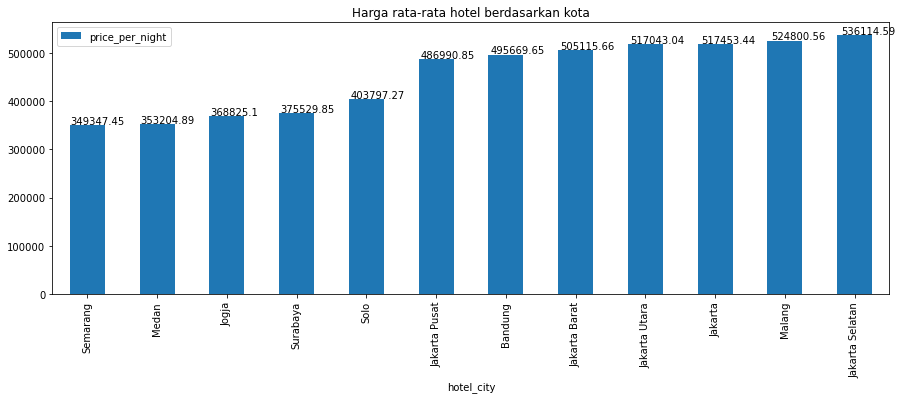

In [33]:
plt.rcParams["figure.figsize"] = [15,5]
df_rt = data_hotel[['price_per_night','hotel_city']].loc[data_hotel['price_per_night'] != 0].groupby(['hotel_city']).mean().reset_index().sort_values(by='price_per_night')
df_rt['price_per_night'] = round(df_rt['price_per_night'],2)
ax = df_rt.plot(kind='bar', x='hotel_city',y='price_per_night',title ='Harga rata-rata hotel berdasarkan kota')
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()*1.005,p.get_height()*1.005))

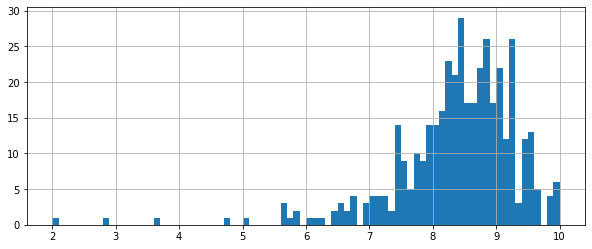

In [51]:
plt.figure(figsize = (10,4))
hasil['rating_x'].hist(bins=80)

Berdasarkan grafik diatas, diketahui bahwa distribusi persebaran rating yang terbanyak terletak diantara 7-10. Pelanggan memberikan rating terbanyak diantara 8-9.4

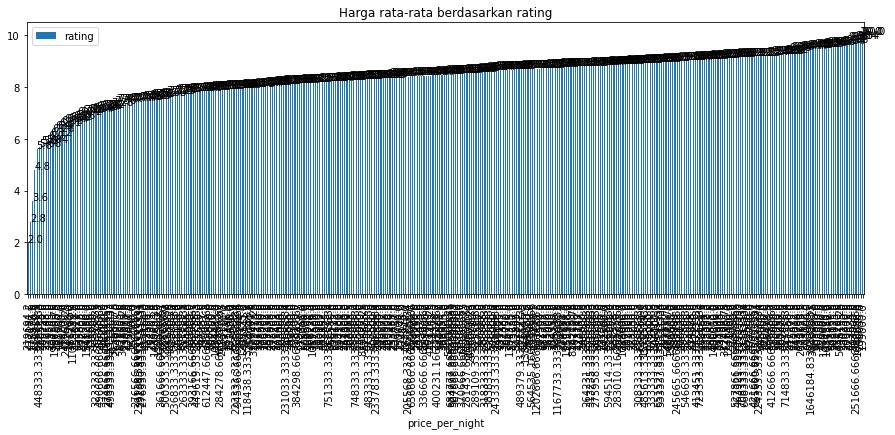

In [34]:
plt.rcParams["figure.figsize"] = [15,5]
df_rt = data_hotel[['price_per_night','rating']].loc[data_hotel['rating'] != 0].groupby(['price_per_night']).mean().reset_index().sort_values(by='rating')
df_rt['rating'] = round(df_rt['rating'],2)
ax = df_rt.plot(kind='bar', x='price_per_night',y='rating',title ='Harga rata-rata berdasarkan rating')

for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()*1.005,p.get_height()*1.005))

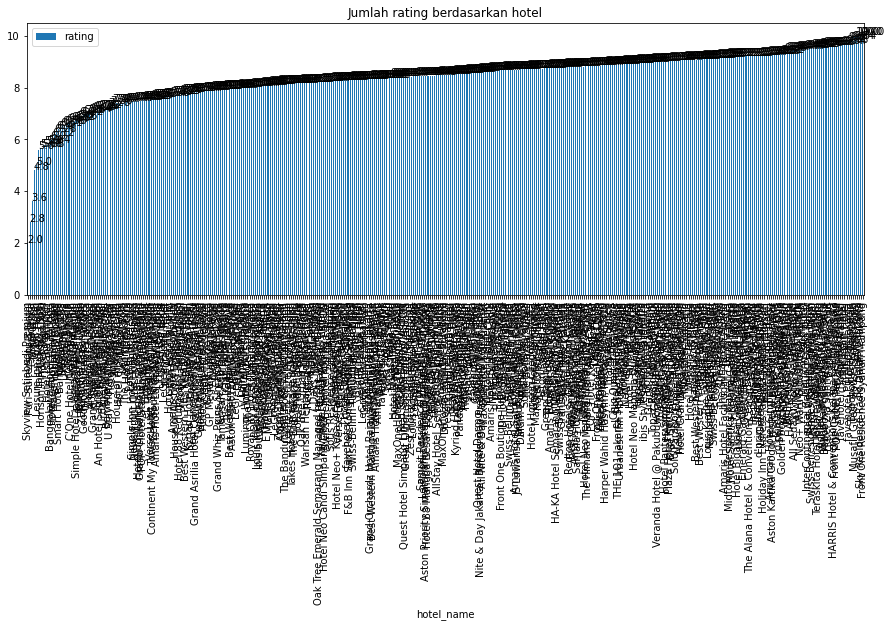

In [38]:
plt.rcParams["figure.figsize"] = [15,5]
df_rt = data_hotel[['hotel_name','rating']].loc[data_hotel['rating'] != 0].groupby(['hotel_name']).mean().reset_index().sort_values(by='rating')
df_rt['rating'] = round(df_rt['rating'],2)
ax = df_rt.plot(kind='bar', x='hotel_name',y='rating',title ='Jumlah rating berdasarkan hotel')
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()*1.005,p.get_height()*1.005))

In [40]:
review_hotel['year'] = pd.DatetimeIndex(review_hotel['booking_date']).year
review_hotel.head()
data_year = pd.merge(review_hotel[['hotel_id','year']],data_hotel[['hotel_id','hotel_city']],on='hotel_id',how='left')
data_year = data_year.drop('hotel_id',axis =1)
data_year.head()

<ipython-input-40-158ca5589c36>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_hotel['year'] = pd.DatetimeIndex(review_hotel['booking_date']).year


,year,hotel_city
0,2020,Surabaya
1,2020,Surabaya
2,2020,Surabaya
3,2020,Surabaya
4,2020,Surabaya


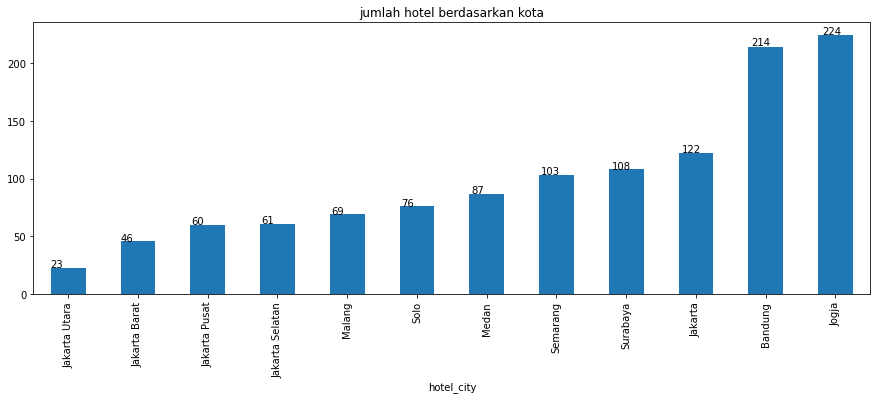

In [41]:
ax = data_hotel.groupby('hotel_city')['hotel_name'].nunique().sort_values().plot(kind='bar',title='jumlah hotel berdasarkan kota')
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()*1.005,p.get_height()*1.005))

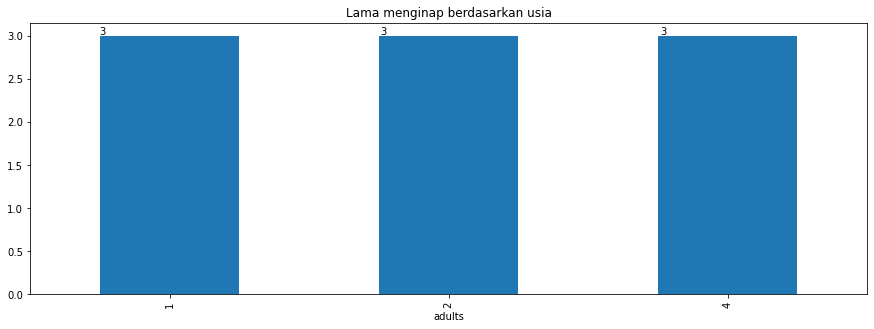

In [43]:
ax = review_hotel.groupby('adults')['stay_duration'].nunique().sort_values().plot(kind='bar',title='Lama menginap berdasarkan usia')
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()*1.005,p.get_height()*1.005))

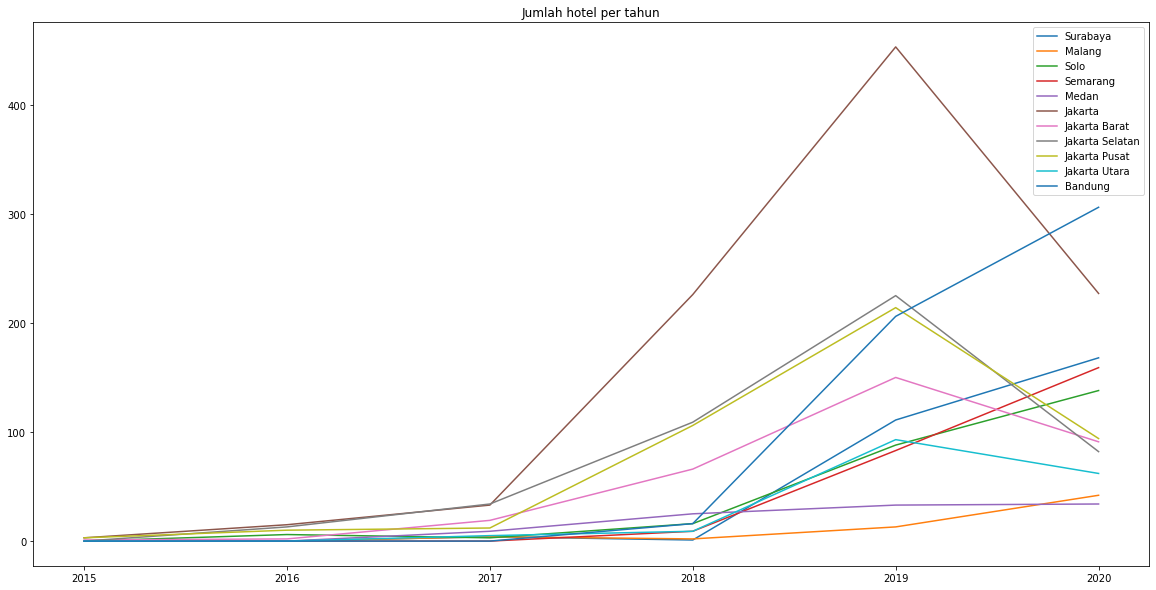

In [44]:
plt.rcParams["figure.figsize"] = [20,10]
plt.title('Jumlah hotel per tahun')

def statistik_kota(kota):
    data = {}
    for j in data_year['year'].unique():
        data[str(j)] = len(data_year.loc[(data_year['year'] == j) & (data_year['hotel_city'] == kota)])
    the_series = pd.Series(data)
    the_series = the_series.sort_index()
    plt.plot(the_series.index, the_series.values, Label = kota)
    plt.legend()
for i in data_year['hotel_city'].unique():
    statistik_kota(i)

Grafik diatas menjelaskan bahwa jumlah pesanan atau booking  hotel setiap tahun berdasarkan kota mengalami cenderung mengalami kenaikan sejak 2015 hingga 2019, namun mulai menurut menuju 2020 yang dikarenakan pandemi Covid19

<ipython-input-45-cacbdc0bc7a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_hotel['day'] = pd.DatetimeIndex(review_hotel['booking_date']).day_name()


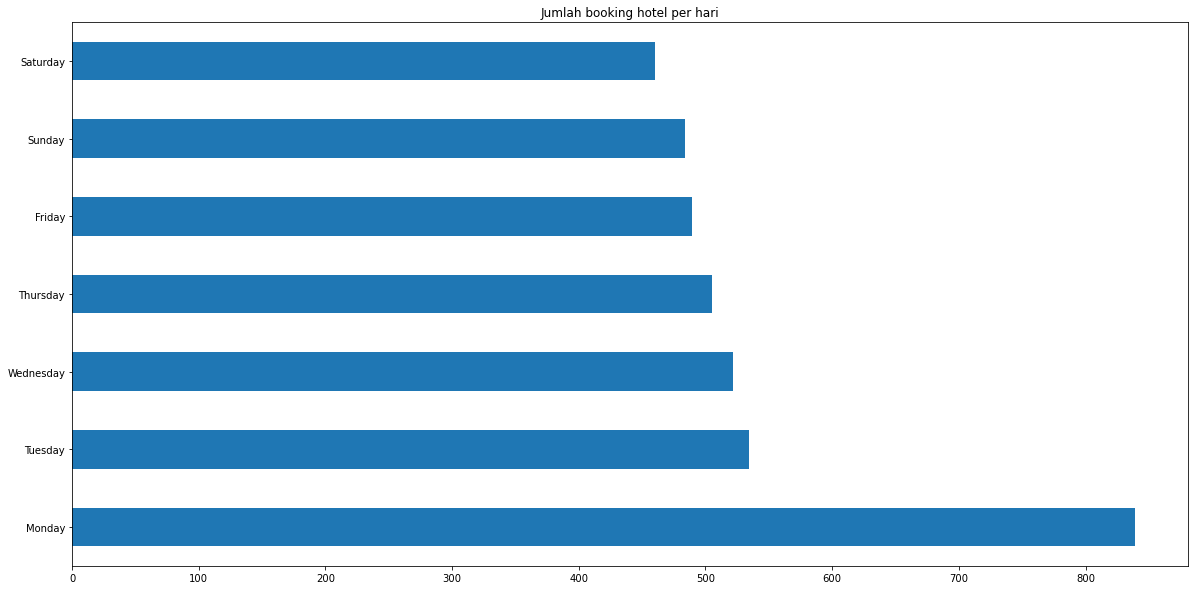

In [45]:
review_hotel['day'] = pd.DatetimeIndex(review_hotel['booking_date']).day_name()
review_hotel['day'].value_counts().plot(kind='barh', title = 'Jumlah booking hotel per hari')

Berdasarkan data diatas pesanan dengan jumlah terbanyak yaitu pada hari senin dan dengan jumlah terdikit pada hari sabtu

# part 1

Membuat sistem rekomendasi berdasarkan review dari customer dan lokasi. Mendapatkan informasi dari review yang terletak di Surabaya


In [58]:
def pemilihan_hotel(service,province,city,top = 5):
    hasil = data_hotel[data_hotel['service_provide'].str.contains(service)]
    [(data_hotel['hotel_province'] == province) & (data_hotel['hotel_city'] == city)].copy()
    hasil = hasil.sort_values(by=['price_per_night','rating'],ascending=[True,False])
    hasil = hasil.drop('max_person', axis = 1)
    hasil = hasil[:top]
    return (hasil)

pemilihan_hotel('Standard Room with Breakfast','Jawa Timur','Jogja')

,hotel_id,hotel_name,hotel_description,hotel_province,hotel_city,hotel_address,service_provide,price_per_night,rating
776,h0783,Lj Hotel Bandung,Lj Hotel Bandung is located in the heart of th...,Jawa Barat,Bandung,"2, Jl. Malabar No.2, Malabar, Lengkong, Bandung",Standard Room with Breakfast,132856.25,7.60
112,h0113,Hotel Aloha,Akomodasi yang nyaman dan strategis di jantung...,Jawa Timur,Malang,"Jl.Gajah Mada No.7, Malang, Jawa Timur, Indonesia",Standard Room with Breakfast,142500.00,8.88
476,h0483,Zen Boutique Syariah Hotel,"Pilihan akomodasi yang ideal untuk Pasangan, B...",DKI Jakarta,Jakarta,"Jl. Kramat 6 No. 28 Rt. 001 Rw. 02 Kel., RT.2/...",Standard Room with Breakfast,143069.25,7.60
444,h0451,Residence T63,"Pilihan akomodasi yang ideal untuk Pasangan, B...",DKI Jakarta,Jakarta Barat,"Jl. Tawakal VI No.3, Tomang, Jakarta Barat, DK...",Standard Room with Breakfast,146200.00,6.56
14,h0015,The Life Hotel Surabaya,"Akomodasi yang Ideal untuk Pebisnis, Wisatawan...",Jawa Timur,Surabaya,"Jl. Kusuma Bangsa No.41, Surabaya, Indonesia",Standard Room with Breakfast,151496.00,7.96


In [89]:
Jakarta = data_hotel.loc[data_hotel['hotel_city'] == 'Jakarta Barat']
Jakarta

,hotel_id,hotel_name,hotel_description,hotel_province,hotel_city,hotel_address,service_provide,price_per_night,rating,max_person
444,h0451,Residence T63,"Pilihan akomodasi yang ideal untuk Pasangan, B...",DKI Jakarta,Jakarta Barat,"Jl. Tawakal VI No.3, Tomang, Jakarta Barat, DK...",Standard Room with Breakfast,1.462000e+05,6.560000,4.0
446,h0453,Tamansari Agung Residence,"Pilihan akomodasi yang ideal untuk Pasangan, B...",DKI Jakarta,Jakarta Barat,"Jl. Keamanan No. 52 Keagungan, Tamansari, Glod...",Standard Room without Breakfast and discount,1.491100e+05,7.942857,2.0
450,h0457,Mega Matra Hotel,Hotel yang dapat memberikan kesejukan dan keny...,DKI Jakarta,Jakarta Barat,"Jl. Matraman Raya No.115, Jakarta Timur",Standard Room with Breakfast,3.754930e+05,8.120000,2.0
451,h0458,All Sedayu Hotel Kelapa Gading,All Sedayu Kelapa Gading menawarkan pengalaman...,DKI Jakarta,Jakarta Barat,"Mall of Indonesia Lobby 5, Jl.Boulevard Barat,...",Standard Room with Breakfast,7.942000e+05,9.440000,4.0
452,h0459,Hotel 55 International,Hotel yang nyaman dengan desain modern di seti...,DKI Jakarta,Jakarta Barat,"Jl. Pangeran Jayakarta No.8, Komplek Artha Cen...",Standard Room with Breakfast,4.121742e+05,8.440000,4.0
457,h0464,All Nite & Day Residence Kebon Jeruk,"Pilihan akomodasi yang ideal untuk Pasangan, B...",DKI Jakarta,Jakarta Barat,"Jl. Perjuangan No. 19A Kebon Jeruk, Jakarta Ba...",Standard Room with Breakfast,3.175000e+05,8.600000,4.0
468,h0475,Hotel Ciputra Jakarta,Merupakan Salah Satu Hotel Bintang 4 Terbaik d...,DKI Jakarta,Jakarta Barat,"Jl. Letjen S. Parman No.11, RW.1, Tj. Duren Ut...",Standard Room with Breakfast,6.492850e+05,7.400000,4.0
474,h0481,favehotel PGC Cililitan,Sebuah Hotel Modern di Cililitan oleh Archipel...,DKI Jakarta,Jakarta Barat,"Jl. Mayjen Sutoyo No.76, Cililitan, Jakarta Ti...",Standard Room with Breakfast,6.358550e+05,6.920000,4.0
494,h0501,Yello Hotel Manggarai,Penginapan tenang dan nyaman di Yello Hotel Ma...,DKI Jakarta,Jakarta Barat,"Jl. Minangkabau Timur No. 9, Manggarai, Jakart...",Standard Room with Breakfast,4.780000e+05,8.960000,4.0
499,h0506,Teraskita Hotel Jakarta Managed by Dafam,Penginapan Yang Tenang Dan Nyaman di Cawang. S...,DKI Jakarta,Jakarta Barat,"Jl. MT. Haryono Kav. 10A, Cawang, Jakarta Timu...",Standard Room with Breakfast,4.200000e+05,9.560000,4.0


In [90]:
low_price = Jakarta.sort_values(by='price_per_night')
low_price

,hotel_id,hotel_name,hotel_description,hotel_province,hotel_city,hotel_address,service_provide,price_per_night,rating,max_person
444,h0451,Residence T63,"Pilihan akomodasi yang ideal untuk Pasangan, B...",DKI Jakarta,Jakarta Barat,"Jl. Tawakal VI No.3, Tomang, Jakarta Barat, DK...",Standard Room with Breakfast,1.462000e+05,6.560000,4.0
717,h0724,Hotel Pinangsia,Penginapan budget di Jakarta untuk kesehatan d...,DKI Jakarta,Jakarta Barat,Jl. Pinangsia I No.55 Kel.Pinangsia Kec.Taman ...,Standard Room without Breakfast and discount,1.479680e+05,6.680000,2.0
446,h0453,Tamansari Agung Residence,"Pilihan akomodasi yang ideal untuk Pasangan, B...",DKI Jakarta,Jakarta Barat,"Jl. Keamanan No. 52 Keagungan, Tamansari, Glod...",Standard Room without Breakfast and discount,1.491100e+05,7.942857,2.0
658,h0665,45 Residence,45 Residence is located in the heart of the bu...,DKI Jakarta,Jakarta Barat,"Jl. Mangga Besar XI, RW.1, Kota Tua, Tangki, T...",Standard Room without Breakfast and discount,1.759785e+05,3.600000,1.0
566,h0573,New Mg Hotel,New Mg Hotel is located in the heart of the bu...,DKI Jakarta,Jakarta Barat,"Jl. Mangga Besar Raya No. 38 AS, Tamansari, Ja...",Standard Room,1.852640e+05,0.000000,2.0
627,h0634,Hollywood Hotel,"Sebuah Hotel yang Nyaman, Lengkap, dan Terjang...",DKI Jakarta,Jakarta Barat,"Jl. Kebun Jeruk 18 No.63, Taman Sari, Jakarta ...",Standard Room with Breakfast,2.233333e+05,7.960000,4.0
745,h0752,Sky Residence Mangga Besar 2 Jakarta,"Pilihan akomodasi yang ideal untuk Pasangan, B...",DKI Jakarta,Jakarta Barat,"Jl. Mangga Besar Raya No 34A, Mangga Besar, Ta...",Standard Room,2.340980e+05,0.000000,2.0
634,h0641,Hotel Dequr Jakarta Kota,Penginapan yang nyaman dan tenang di Jakarta P...,DKI Jakarta,Jakarta Barat,"Jl. Kali Besar Barat No.27, RW.3, Roa Malaka, ...",Standard Room with Breakfast,2.395850e+05,6.120000,4.0
568,h0575,Urbanest Inn House Slipi,Penginapan yang nyaman dan tenang. Sebagai hot...,DKI Jakarta,Jakarta Barat,"Jl. H. Saili No.39-40, RT.5/RW.5, Kemanggisan,...",Standard Room with Breakfast,2.746667e+05,7.200000,4.0
561,h0568,B Shaw Hotel & Restaurant,Penginapan tenang dan nyaman di Jakarta Sebuah...,DKI Jakarta,Jakarta Barat,"Jl. Kebon Sirih Barat I Gg. 7 No. 5, Menteng, ...",Standard Room with Breakfast,3.000000e+05,9.280000,4.0


In [91]:
lowprice_bestrating_service = low_price.sort_values(by=['rating','service_provide','max_person'],ascending=False)
lowprice_bestrating_service.head()

,hotel_id,hotel_name,hotel_description,hotel_province,hotel_city,hotel_address,service_provide,price_per_night,rating,max_person
678,h0685,Ethan Hotel,"Pilihan akomodasi yang ideal untuk Pasangan, B...",DKI Jakarta,Jakarta Barat,"Jl. Pegangsaan Indah Barat Blok B No. 81, Kela...",Standard Room with Breakfast,357500.0,10.00,4.0
499,h0506,Teraskita Hotel Jakarta Managed by Dafam,Penginapan Yang Tenang Dan Nyaman di Cawang. S...,DKI Jakarta,Jakarta Barat,"Jl. MT. Haryono Kav. 10A, Cawang, Jakarta Timu...",Standard Room with Breakfast,420000.0,9.56,4.0
451,h0458,All Sedayu Hotel Kelapa Gading,All Sedayu Kelapa Gading menawarkan pengalaman...,DKI Jakarta,Jakarta Barat,"Mall of Indonesia Lobby 5, Jl.Boulevard Barat,...",Standard Room with Breakfast,794200.0,9.44,4.0
713,h0720,BI Executive Hotel Ancol,Penginapan Yang Tenang Dan Nyaman di Jakarta U...,DKI Jakarta,Jakarta Barat,"Jl. Gunung Sahari No. 2, RT. 01 / RW. 013, Pad...",Standard Room with Breakfast,425375.0,9.40,4.0
561,h0568,B Shaw Hotel & Restaurant,Penginapan tenang dan nyaman di Jakarta Sebuah...,DKI Jakarta,Jakarta Barat,"Jl. Kebon Sirih Barat I Gg. 7 No. 5, Menteng, ...",Standard Room with Breakfast,300000.0,9.28,4.0


Berdasarkan data diatas, dapat disimpulkan bahwa :
    - The Ethan Hotel hotel gandekan merupakan hotel di Jakarta dengan harga termurah dengan rating terbaik dan service yang terbaik

In [85]:
x = data_hotel.drop(['price_per_night','hotel_id','hotel_description'],axis =1)
y =data_hotel['price_per_night']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
x

,hotel_name,hotel_province,hotel_city,hotel_address,service_provide,rating,max_person
0,Midtown Residence Marvell City Surabaya,Jawa Timur,Surabaya,Jalan Ngagel Raya No 123,Standard Room with Breakfast,9.20,3.0
1,favehotel Graha Agung Surabaya,Jawa Timur,Surabaya,Jl. Mayjen Yono Soewoyo Pakuwon Indah Square A...,Standard Room with Breakfast,8.32,3.0
2,The Sun Hotel Sidoarjo,Jawa Timur,Surabaya,"Jl. Pahlawan No.1,Sidokumpul, Sidoarjo, Suraba...",Standard Room with Breakfast,8.76,3.0
3,Grand Surabaya Hotel,Jawa Timur,Surabaya,"Jl. Pemuda 19-21, Surabaya, Indonesia",Standard Room with Breakfast,8.52,3.0
4,The WIN Hotel Surabaya,Jawa Timur,Surabaya,"Jl. Embong Tanjung 46 - 48 Surabaya, Jawa Timu...",Standard Room with Breakfast,8.04,3.0
...,...,...,...,...,...,...,...
1188,Restu Hotel Yogyakarta,Daerah Istimewa Yogyakarta,Jogja,"Jl. Batikan No. 7, Pandeyan, Kec. Umbulharjo, ...",Standard Room,0.00,2.0
1189,Oryza Hotel Malioboro,Daerah Istimewa Yogyakarta,Jogja,"Sosrowijayan St No.49-51, Sosromenduran, Gedon...",Standard Room,0.00,2.0
1190,Hotel Asri Graha Yogyakarta,Daerah Istimewa Yogyakarta,Jogja,"Jl. Veteran No. 184 A, Umbulharjo, Yogyakarta,...",Standard Room,0.00,2.0
1191,Tasneem Convention Hotel Yogyakarta,Daerah Istimewa Yogyakarta,Jogja,"Kawasan Mandira Baruga, Jl. Brigjen Katamso, K...",Standard Room,0.00,2.0


In [82]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(954, 7)
(954,)
(239, 7)
(239,)


In [83]:
lin_reg = LinearRegression()

In [84]:
lin_reg.fit(x_train, y_train)

ValueError: could not convert string to float: 'The Nyaman Solo'